__Table of contents__

1. [Basic plots](#Basic-plots)
    1. [Example 1](#Example-1)
    1. [Example 2](#Example-2)
    1. [Example 3](#Example-3)
1. [Advanced plots](#Advanced-plots)
    1. [Example 4](#Example-4)
    1. [Example 5](#Example-5)
    1. [Example 6](#Example-6)
    1. [Example 7](#Example-7)



In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# data extensions and settings
import numpy as np
import pandas as pd

import textwrap 

# modeling extensions
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression, LogisticRegression, SGDRegressor
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# visualization extensions and settings
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import sys
sys.path.append('../../../dev/mlmachine')
sys.path.append('../../../dev/prettierplot')

from prettierplot.plotter import PrettierPlot
import prettierplot.data as data
import prettierplot.style as style
import mlmachine as mlm


c:\users\petersont\appdata\local\continuum\anaconda3\envs\test-dev\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# Basic plots

<a id = 'Basic-plots'></a>

## Example 1

<a id = 'Example-1'></a>

__Load data__

In [2]:
# load employee attition dataset
df = data.attrition()

# capture unique EmployeeField values and frequency counts
unique_vals, unique_counts = np.unique(
            df[df["EducationField"].notnull()]["EducationField"], return_counts=True
        )

__Plain visualization__

<Figure size 432x288 with 0 Axes>

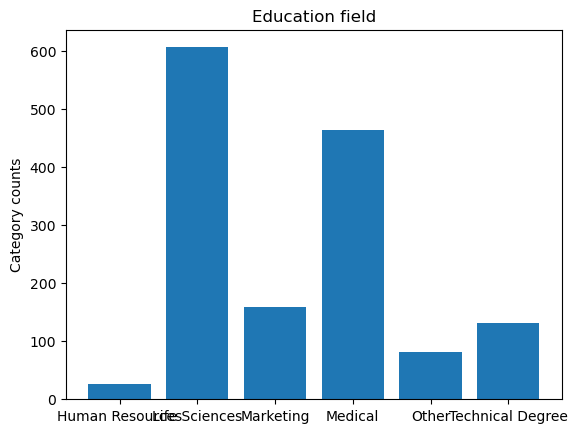

In [3]:
# setup figure
fig = plt.figure()
plt.style.use('default')
plt.figure(facecolor="white")

# create plot
plt.bar(x=unique_vals, height=unique_counts)

# decorate
plt.title("Education field")
plt.ylabel("Category counts")

plt.show()

<Figure size 640x480 with 0 Axes>

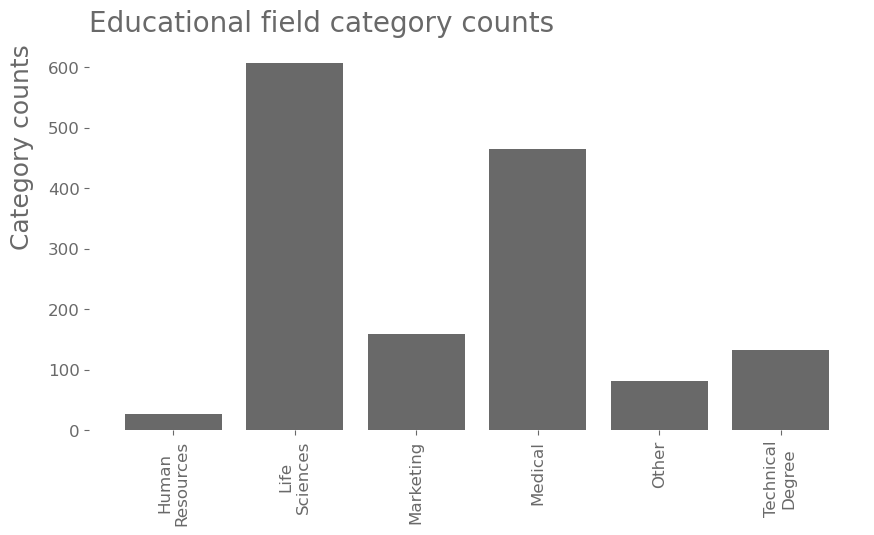

In [4]:
# setup figure
plt.figure(facecolor="white")

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

# create plot
ax.bar(x=unique_vals,
       height=unique_counts,
       color=(105 / 255, 105 / 255, 105 / 255),
    )

# decorate
x = ["\n".join(textwrap.wrap(i.replace("_", " "), 12)) for i in unique_vals]
ax.set_xticklabels(x)

ax.tick_params(
    axis="both",
    colors=(105 / 255, 105 / 255, 105 / 255),
    labelsize=12,
)

ax.set_title(
    "Educational field category counts",
    fontsize=2.0 * 10,
    color=(105 / 255, 105 / 255, 105 / 255),
    loc="left",
    pad=10,
)

# remove grid line and right/top spines
ax.grid(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# add axis labels
plt.ylabel(
    "Category counts",
    fontsize=18,
    labelpad=10,
    position=(1.0, 0.47),
    horizontalalignment="left",
    color=(105 / 255, 105 / 255, 105 / 255),
)

# rotate x-tick labels
plt.xticks(rotation=90)

plt.show()

__Pretty visualization__

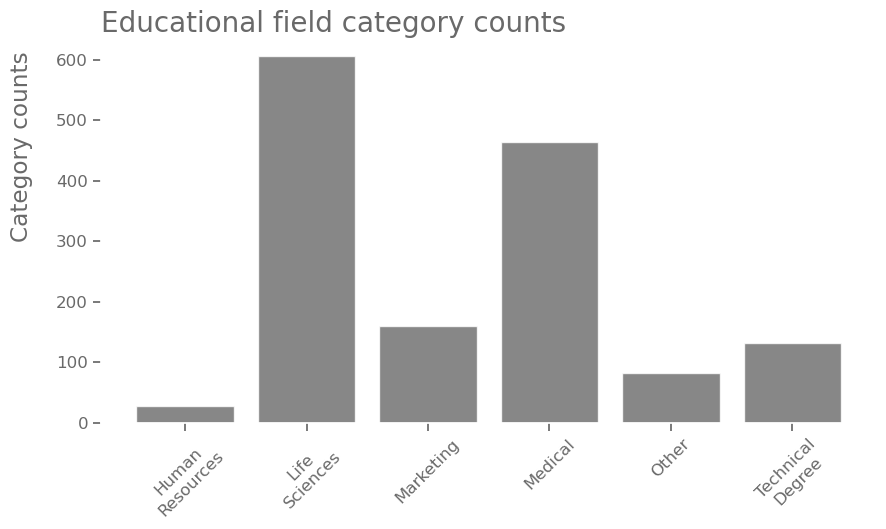

In [5]:
# create plotting instance
p = PrettierPlot(chart_scale=10)

# create Axes object and decorate
ax = p.make_canvas(title="Educational field category counts", y_label="Category counts", y_shift=0.47)

# add plots
p.bar_v(
    x=unique_vals,
    counts=unique_counts,
    label_rotate=45,
    x_tick_wrap=True,
#     ax=ax,
)

In [6]:
p.bar_v??

## Example 2

<a id = 'Example-2'></a>

__Load data__

In [7]:
# load housing dataset
df, _ = data.housing()

# set predictor and target features
X = df["1stFlrSF"].values.reshape(-1,1)
y = df["SalePrice"].values.reshape(-1,1)

# instantiate model object and fit
model = LinearRegression()
model.fit(X,y)

# generate predictions
xs = np.linspace(0, 5000, 10000).reshape(-1,1)
preds = model.predict(xs)

__Plain visualization__

<Figure size 640x480 with 0 Axes>

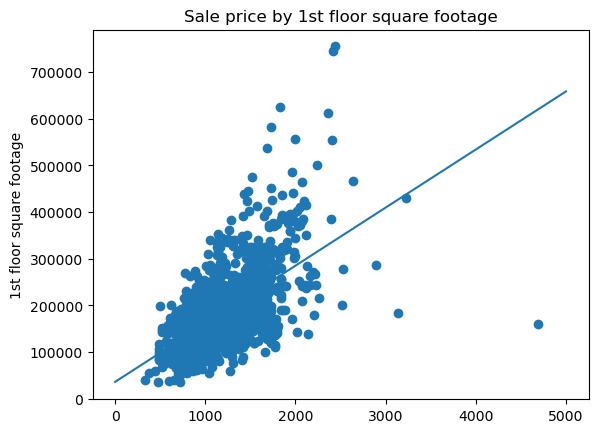

In [8]:
# setup figure
fig = plt.figure()
plt.style.use('default')
plt.figure(facecolor="white")

# create plot
plt.scatter(X,y)
plt.plot(xs, preds)

# decorate
plt.title("Sale price by 1st floor square footage")
plt.ylabel("Sale price")
plt.ylabel("1st floor square footage")

plt.show()

<Figure size 640x480 with 0 Axes>

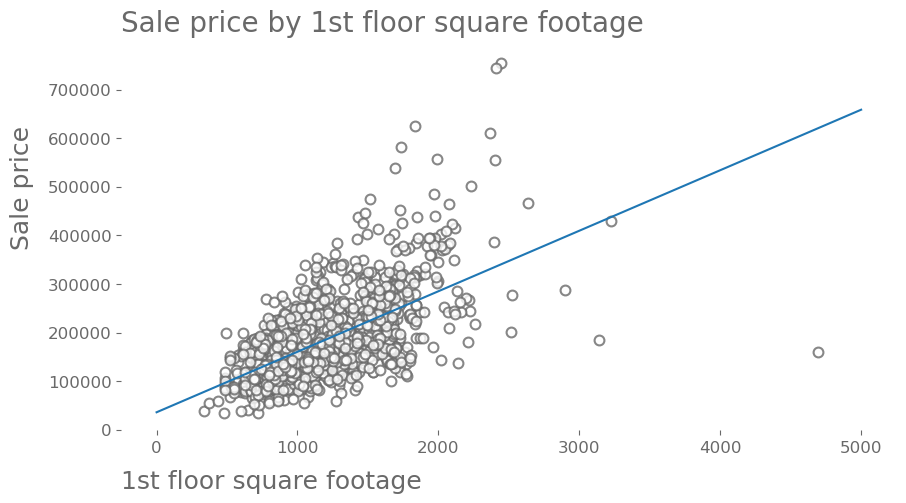

In [9]:
# setup figure
plt.figure(facecolor="white")

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

# create plot
plt.scatter(
        x=X,
        y=y,
        color=(105 / 255, 105 / 255, 105 / 255),
        s=50,
        alpha=0.8,
        facecolor="white",
        linewidth=1.5,
    )
plt.plot(xs, preds)

ax.tick_params(
    axis="both",
    colors=(105 / 255, 105 / 255, 105 / 255),
    labelsize=12,
)

ax.set_title(
    "Sale price by 1st floor square footage",
    fontsize=2.0 * 10,
    color=(105 / 255, 105 / 255, 105 / 255),
    loc="left",
    pad=10,
)

# remove grid line and right/top spines
ax.grid(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# add axis labels
plt.ylabel(
    "Sale price",
    fontsize=18,
    labelpad=10,
    position=(1.0, 0.47),
    horizontalalignment="left",
    color=(105 / 255, 105 / 255, 105 / 255),
)
plt.xlabel(
    "1st floor square footage",
    fontsize=18,
    labelpad=10,
    position=(0.0, 0.5),
    horizontalalignment="left",
    color=(105 / 255, 105 / 255, 105 / 255),
)

plt.show()

__Pretty visualization__

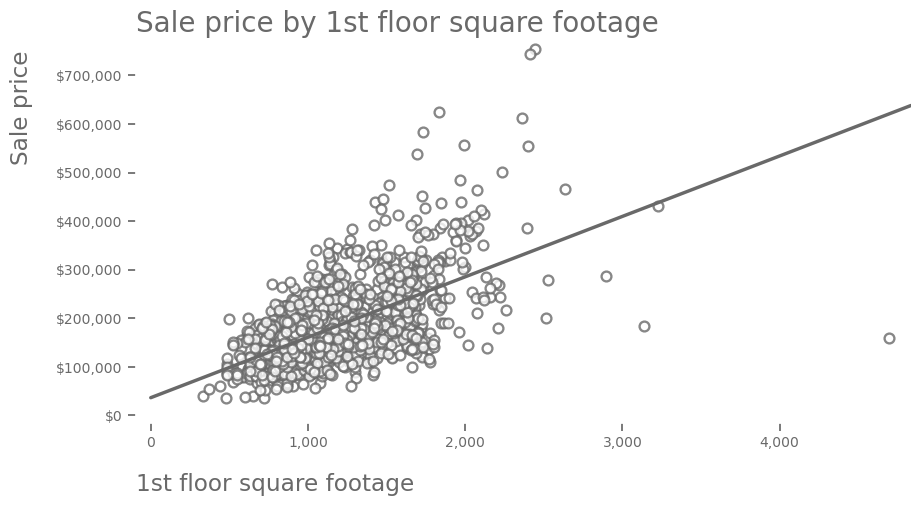

In [10]:
# create plotting instance
p = PrettierPlot(chart_scale=10)

# create Axes object and decorate
ax = p.make_canvas(
    title="Sale price by 1st floor square footage",
    x_label="1st floor square footage",
    y_label="Sale price",
    y_shift=0.67
)

# add plots
p.scatter_2d(x=X, y=y, x_units="f", y_units="d", ax=ax)
p.line(x=xs, y=preds, x_units="f", y_units="d", ax=ax)

## Example 3

<a id = 'Example-3'></a>

__Load data__

In [ ]:
# load titanic dataset
df, _ = data.titanic()

# set predictor and target variables
df = df[["Survived","Pclass","Fare","Age"]].dropna()
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

# build parameter grid
k_range = np.arange(1, 41)
param_grid = dict(n_neighbors=k_range)

# run GridSearcCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring="accuracy")
grid_search.fit(X, y)

# capture mean accuracy for each value of k
all_means = grid_search.cv_results_["mean_test_score"]

__Plain visualization__

In [ ]:
# setup figure
fig = plt.figure()
plt.style.use('default')
plt.figure(facecolor="white")

# create plot
plt.plot(k_range, all_means)

# decorate
plt.title("Accuracy by k-value")
plt.xlabel("k")
plt.ylabel("Accuracy")

# plt.savefig(fname="./ex3_plain.svg", format="svg")
plt.show()

__Plain visualization__

In [ ]:
# create plotting instance
p = PrettierPlot(chart_scale=10)

# create Axes object and decorate
ax = p.make_canvas(
    title="Accuracy by k-value",
    x_label="k-value",
    y_label="Accuracy",
    y_shift=0.6,
)

# add plot
p.line(x=k_range, y=all_means, x_units="f", y_units="p", marker_on=True, ax=ax)

# Advanced plots

<a id = 'Advanced-plots'></a>

## Example 4

<a id = 'Example-4'></a>

__Load data__

In [ ]:
# load employee attrition dataset
df = data.attrition()

__Plain visualization__

In [ ]:
sns.set()
g = sns.FacetGrid(
    df,
    col="MaritalStatus",
    row="Gender",
    hue="JobSatisfaction",
    height=4,
    aspect=1,
    margin_titles=True,
)
g = g.map(
    plt.scatter,
    "MonthlyIncome",
    "TotalWorkingYears"
).add_legend()

plt.savefig(fname="./ex3_plain.svg", format="svg")

__Pretty visualization__

In [ ]:
# facet Pclass vs Embarked
p = PrettierPlot(chart_scale=15)
p.facet_cat_num_scatter(
    df,
    x="MonthlyIncome",
    y="TotalWorkingYears",
    cat_row="Gender",
    cat_col="MaritalStatus",
    split="JobSatisfaction",
    bbox=(1.6, 1.2),
    aspect=1,
    height=3.5,
    legend_labels=["1","2","3","4"],
    x_units="d",
    color_map="viridis"
)

## Example 5

<a id = 'Example-5'></a>

__Load data__

In [ ]:
# load employee attrition dataset
df, _ = data.titanic()

__Plain visualization__

In [ ]:
sns.set()
g = sns.FacetGrid(
    df,
    row="Sex",
    col="Embarked",
    hue="Survived",
#         hue_order=df[split].sort_values().drop_duplicates().values.tolist()
#         if split is not None
#         else None,
#         palette=style.style_hex_mid,
    despine=True,
    height=4,
    aspect=1,
    margin_titles=True,
)
g.map(
    plt.hist,
    "Age",
    alpha=0.5,
).add_legend()

__Pretty visualization__

In [ ]:
#
p = PrettierPlot()
p.facet_cat_num_hist(
    df=df,
    split="Survived",
    legend_labels=["Died", "Lived"],
    cat_row="Sex",
    cat_col="Embarked",
    num_col="Age",
    bbox=(1.9, 1.0),
    height=4,
    aspect=1,
)

## Example 6

<a id = 'Example-6'></a>

__Load data__

In [ ]:
# load employee attrition dataset
df, _ = data.titanic()

__Plain visualization__

In [ ]:
sns.set()
g = sns.FacetGrid(
    df,
    col="Embarked",
#     row="Sex",
    aspect=1,
    height=4,
    margin_titles=True
)
g.map(
    sns.pointplot,
    "Sex",
    "Survived",
    "Pclass",
#     hue_order=["1","2","3"],
#     order=df[x].sort_values().drop_duplicates().values.tolist(),
#     hue_order=df[split].sort_values().drop_duplicates().values.tolist(),
#     palette=style.style_hex_mid,
    alpha=0.75,
    ci=None,
).add_legend()

__Pretty visualization__

In [ ]:
#
p = PrettierPlot()
p.facet_two_cat_point(
    df=df,
    x="Sex",
    y="Survived",
    split="Pclass",
    cat_col="Embarked",
    aspect=1.0,
    height=5,
    bbox=(1.3, 1.2),
    legend_labels=["1st class", "2nd class", "3rd class"],
)

## Example 7

<a id = 'Example-7'></a>

__Load data__

In [ ]:
# load titanic dataset
df, _ = data.titanic()

__Plain visualization__

In [ ]:
sns.set()
g = sns.barplot(
    data=df,
    x="Embarked",
    y="Survived",
    hue="Pclass",
#         palette=style.style_hex_mid,
#         order=df[x].sort_values().drop_duplicates().values.tolist(),
#         hue_order=df[split].sort_values().drop_duplicates().values.tolist()
#         if split is not None
#         else None,
    ci=None,
)

__Pretty visualization__

In [ ]:
# facet Pclass vs Embarked
p = PrettierPlot(chart_scale=12)
ax = p.make_canvas(title="Survivorship, embark location by passenger class", y_shift=0.7)
p.facet_two_cat_bar(
    df=df,
    x="Embarked",
    y="Survived",
    split="Pclass",
    y_units="ff",
    legend_labels=["1st class", "2nd class", "3rd class"],
    ax=ax,
)

# extra

In [ ]:
df = data.attrition()

In [ ]:
# correlation heat map
p = PrettierPlot()
ax = p.make_canvas()
p.corr_heatmap(df=df.select_dtypes(include="number").iloc[:,10:], annot=False, ax=ax)

In [ ]:
# pair plot
p = PrettierPlot(chart_scale=12)
p.pair_plot(df=df.iloc[:,:5], diag_kind="auto")

In [ ]:
# pair plot
p = PrettierPlot(chart_scale=12)
p.pair_plot(
    df=machine.training_features.dropna(),
    diag_kind="kde",
    target=machine.training_target,
    columns=["Age", "Fare", "Pclass", "Parch", "SibSp"],
    legend_labels=["Died", "Survived"],
    bbox=(2.0, 0.0),
)